# Model Performance Summary

## Balanced Dataset

### Machine Learning Methods

| Method | Accuracy | Recall | Precision | Code Reference |
|--------|----------|--------|-----------|----------------|
| SIFT + SVM | 67% | 0.67 | 67% | [SIFT_SVM](#SIFT+SVM) |
| LBP + KNN | 48% | 0.48 | 50% | [LBP+KNN](#LBP+KNN) |
| SIFT + SVM + Preprocessing | 69% | 0.69 | 70% | [SIFT_SVM_Preprocessing](#sift-svm-preprocessing) |
| SIFT + SVM + Edge Construction | 50% | 0.51 | 51% | [SIFT_SVM_Edge](#sift-svm-edge) |

### Deep Learning Methods

| Method | Accuracy | Recall | Precision | Code Reference |
|--------|----------|--------|-----------|----------------|
| ResNet18 | 97% | 0.97 | 97% | [ResNet18_Balanced](#resnet18-balanced) |
| EfficientNet-B0 | 98% | 0.98 | 98% | [EfficientNet_Balanced](#efficientnet-balanced) |

## Imbalanced Dataset

| Method | Accuracy | Recall | Precision | Code Reference |
|--------|----------|--------|-----------|----------------|
| ResNet18 | 91.58% | 0.90 | 91.4% | [ResNet18_Imbalanced](#resnet18-imbalanced) |
| EfficientNet | 88.74% | 0.89 | 90.57% | [EfficientNet_Imbalanced](#efficientnet-imbalanced) |
| ResNet18 + FocalLoss + Reweighting | 91% | 0.91 | 92% | [ResNet18_Focal_Reweight](#resnet18-focal-reweight) |
| ResNet18 + Focal + Dice Loss | 91% | 0.91 | 90% | [ResNet18_Focal_Dice](#resnet18-focal-dice) |
| ResNet18 + Augment + Focal + Dice + Sampler | 92.75% | 0.9282 | 92.81% | [ResNet18_Augment_Focal_Dice_Sampler](#resnet18-augment-focal-dice-sampler) |

## Final Recommendations

1. For balanced datasets:
   - Best ML approach: SIFT + SVM + Preprocessing (69% accuracy)
   - Best DL approach: EfficientNet-B0 (98% accuracy)

2. For imbalanced datasets:
   - Best approach: ResNet18 + Augment + Focal + Dice + Sampler (92.75% accuracy)

> **Note:** To validate its generalizability, we tested the method on a new imbalanced dataset, comparing ResNet18 with and without augmentation, focal loss, dice loss, and sampler. The results suggest that the enhanced method continues to perform best.


# Data Visualization

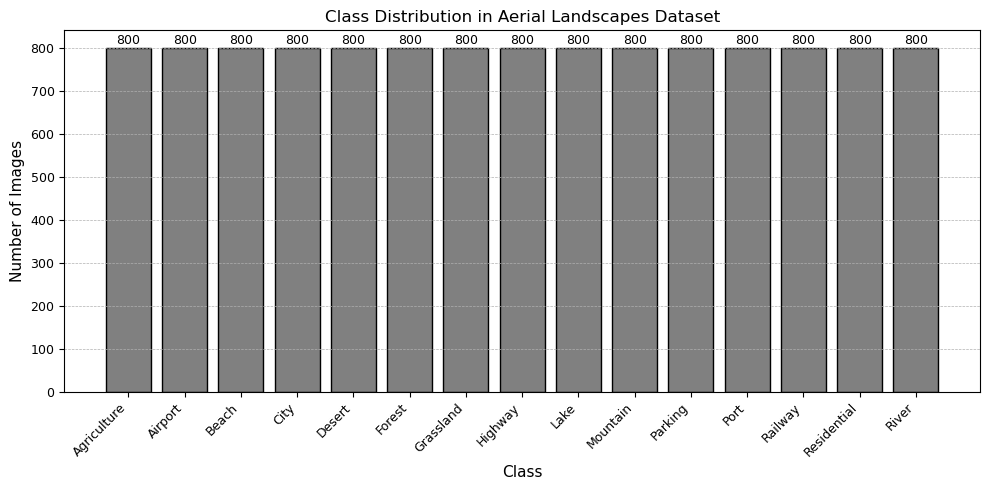

In [10]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(image_dir):
    class_counts = {}
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        count = len([file for file in os.listdir(class_path)
                     if os.path.isfile(os.path.join(class_path, file))])
        class_counts[class_name] = count

    sorted_counts = dict(sorted(class_counts.items()))
    classes = list(sorted_counts.keys())
    counts = list(sorted_counts.values())

    plt.figure(figsize=(10, 5))
    bars = plt.bar(classes, counts, color='gray', edgecolor='black')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=9)

    plt.title("Class Distribution in Aerial Landscapes Dataset", fontsize=12)
    plt.xlabel("Class", fontsize=11)
    plt.ylabel("Number of Images", fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig("res/class_distribution.png", dpi=300)

plot_class_distribution("Aerial_Landscapes")

# Balanced Data

## Traditional Machine Learning

### SIFT+SVM

In [3]:
'''SIFT+SVM'''
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

def load_sift_features(image_dir, max_per_class=30):
    sift = cv2.SIFT_create()
    features, labels = [], []
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        count = 0
        for file in os.listdir(class_path):
            if count >= max_per_class:
                break
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            
            keypoints, descriptor = sift.detectAndCompute(img, None)
            if descriptor is not None:
                descriptor = descriptor.mean(axis=0) 
                features.append(descriptor)
                labels.append(class_name)
                count += 1
    return np.array(features), np.array(labels)

features, labels = load_sift_features(r'Aerial_Landscapes', max_per_class=200)


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, stratify=labels, random_state=42)

clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print("Classification Report (SIFT + SVM):")
print(classification_report(y_test, y_pred))

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
n_classes = y_test_bin.shape[1]


Classification Report (SIFT + SVM):
              precision    recall  f1-score   support

 Agriculture       0.74      0.72      0.73        40
     Airport       0.38      0.50      0.43        40
       Beach       0.45      0.62      0.53        40
        City       0.64      0.53      0.58        40
      Desert       0.51      0.53      0.52        40
      Forest       0.71      0.90      0.79        40
   Grassland       0.55      0.53      0.54        40
     Highway       0.50      0.50      0.50        40
        Lake       0.46      0.40      0.43        40
    Mountain       0.88      0.75      0.81        40
     Parking       0.83      0.75      0.79        40
        Port       0.83      0.62      0.71        40
     Railway       0.74      0.70      0.72        40
 Residential       0.72      0.82      0.77        40
       River       0.39      0.30      0.34        40

    accuracy                           0.61       600
   macro avg       0.62      0.61      0.61 

### LBP + KNN

In [2]:
'''LBP+KNN'''
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skimage.feature import local_binary_pattern

radius = 1
n_points = 8 * radius

def extract_lbp_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    '''img = cv2.resize(img, (128, 128))'''
    lbp = local_binary_pattern(img, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  
    return hist

def load_lbp_features(image_dir, max_per_class=30):
    features, labels = [], []
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        count = 0
        for file in os.listdir(class_path):
            if count >= max_per_class:
                break
            img_path = os.path.join(class_path, file)
            feat = extract_lbp_features(img_path)
            if feat is not None:
                features.append(feat)
                labels.append(class_name)
                count += 1
    return np.array(features), np.array(labels)

features, labels = load_lbp_features(r'Aerial_Landscapes', max_per_class=800)

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, stratify=labels, random_state=42)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report (LBP + kNN):")
print(classification_report(y_test, y_pred))


Classification Report (LBP + kNN):
              precision    recall  f1-score   support

 Agriculture       0.36      0.57      0.44       160
     Airport       0.24      0.38      0.29       160
       Beach       0.32      0.40      0.35       160
        City       0.37      0.46      0.41       160
      Desert       0.46      0.48      0.47       160
      Forest       0.77      0.83      0.80       160
   Grassland       0.74      0.62      0.67       160
     Highway       0.37      0.32      0.34       160
        Lake       0.53      0.44      0.48       160
    Mountain       0.53      0.49      0.51       160
     Parking       0.58      0.38      0.45       160
        Port       0.64      0.57      0.61       160
     Railway       0.46      0.28      0.35       160
 Residential       0.55      0.54      0.55       160
       River       0.38      0.23      0.28       160

    accuracy                           0.47      2400
   macro avg       0.49      0.47      0.47  

> **Observation:** SIFT is much better than LBP,so I will try different methods to imporve the behavior of SIFT,respectively denoising and using edge constructive detection.

### SIFT with preprocessing

In [4]:
'''SIFT with preprocessing'''
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def preprocess_image(img):
    '''img = cv2.resize(img, (128, 128))'''                       
    img = cv2.GaussianBlur(img, (3, 3), 0)                  
    img = cv2.equalizeHist(img)                             
    return img

def load_sift_features_preprocessed(image_dir, max_per_class=200):
    sift = cv2.SIFT_create()
    features, labels = [], []
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        count = 0
        for file in os.listdir(class_path):
            if count >= max_per_class:
                break
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = preprocess_image(img)  
            keypoints, descriptor = sift.detectAndCompute(img, None)
            if descriptor is not None:
                descriptor = descriptor.mean(axis=0) 
                features.append(descriptor)
                labels.append(class_name)
                count += 1
    return np.array(features), np.array(labels)

features_prep, labels_prep = load_sift_features_preprocessed(
    r'Aerial_Landscapes', max_per_class=200)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    features_prep, labels_prep, test_size=0.2, stratify=labels_prep, random_state=42)

clf_p = SVC(kernel='linear')
clf_p.fit(X_train_p, y_train_p)
y_pred_p = clf_p.predict(X_test_p)

print("Classification Report (SIFT + SVM with Preprocessing):")
print(classification_report(y_test_p, y_pred_p))


Classification Report (SIFT + SVM with Preprocessing):
              precision    recall  f1-score   support

 Agriculture       0.73      0.80      0.76        40
     Airport       0.57      0.70      0.63        40
       Beach       0.62      0.65      0.63        40
        City       0.78      0.80      0.79        40
      Desert       0.56      0.57      0.57        40
      Forest       0.75      0.75      0.75        40
   Grassland       0.56      0.62      0.59        40
     Highway       0.71      0.60      0.65        40
        Lake       0.46      0.45      0.46        40
    Mountain       0.78      0.70      0.74        40
     Parking       0.94      0.85      0.89        40
        Port       0.97      0.82      0.89        40
     Railway       0.66      0.78      0.71        40
 Residential       0.86      0.90      0.88        40
       River       0.50      0.38      0.43        40

    accuracy                           0.69       600
   macro avg       0.70  

> **Observation:** SIFT is sensetive for high frequency area.So use gaussian filter and histogram equalize improve the performance.

### SIFT + Edge Contrusction Detection

In [7]:
'''SIFT+edge constraction dectection'''
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def load_sift_on_edges(image_dir, max_per_class=200):
    sift = cv2.SIFT_create()
    features, labels = [], []
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        count = 0
        for file in os.listdir(class_path):
            if count >= max_per_class:
                break
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            '''img = cv2.resize(img, (128, 128))'''
            edge = cv2.Canny(img, 50, 150)  
            keypoints, descriptor = sift.detectAndCompute(edge, None)
            if descriptor is not None:
                descriptor = descriptor.mean(axis=0)
                features.append(descriptor)
                labels.append(class_name)
                count += 1
    return np.array(features), np.array(labels)

features_edge, labels_edge = load_sift_on_edges(
    r'Aerial_Landscapes', max_per_class=200)

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    features_edge, labels_edge, test_size=0.2, stratify=labels_edge, random_state=42)

clf_edge = SVC(kernel='linear')
clf_edge.fit(X_train_e, y_train_e)
y_pred_e = clf_edge.predict(X_test_e)

print("Classification Report (SIFT on Canny Edges + SVM):")
print(classification_report(y_test_e, y_pred_e))

Classification Report (SIFT on Canny Edges + SVM):
              precision    recall  f1-score   support

 Agriculture       0.67      0.72      0.70        40
     Airport       0.36      0.50      0.42        40
       Beach       0.43      0.47      0.45        40
        City       0.41      0.60      0.48        40
      Desert       0.36      0.30      0.33        40
      Forest       0.70      0.75      0.72        40
   Grassland       0.40      0.47      0.43        40
     Highway       0.50      0.35      0.41        40
        Lake       0.39      0.40      0.40        40
    Mountain       0.54      0.53      0.53        40
     Parking       0.72      0.70      0.71        40
        Port       0.66      0.47      0.55        40
     Railway       0.51      0.50      0.51        40
 Residential       0.67      0.60      0.63        40
       River       0.35      0.20      0.25        40

    accuracy                           0.51       600
   macro avg       0.51      

## Deep learning methods

### resnet18

Using device: cpu
Epoch 1/5 - Loss: 122.0576
Epoch 2/5 - Loss: 27.5347
Epoch 3/5 - Loss: 15.3001
Epoch 4/5 - Loss: 11.6127
Epoch 5/5 - Loss: 10.5275
Classification Report (ResNet18):
              precision    recall  f1-score   support

 Agriculture       0.99      0.96      0.97       160
     Airport       0.98      0.92      0.95       168
       Beach       0.99      0.97      0.98       174
        City       0.98      0.97      0.98       173
      Desert       0.97      0.94      0.96       162
      Forest       0.98      1.00      0.99       158
   Grassland       0.98      0.98      0.98       161
     Highway       0.98      0.98      0.98       142
        Lake       0.99      0.97      0.98       156
    Mountain       0.94      0.97      0.96       153
     Parking       0.98      0.97      0.97       176
        Port       0.94      1.00      0.97       165
     Railway       0.93      0.98      0.95       153
 Residential       0.99      0.99      0.99       146
      

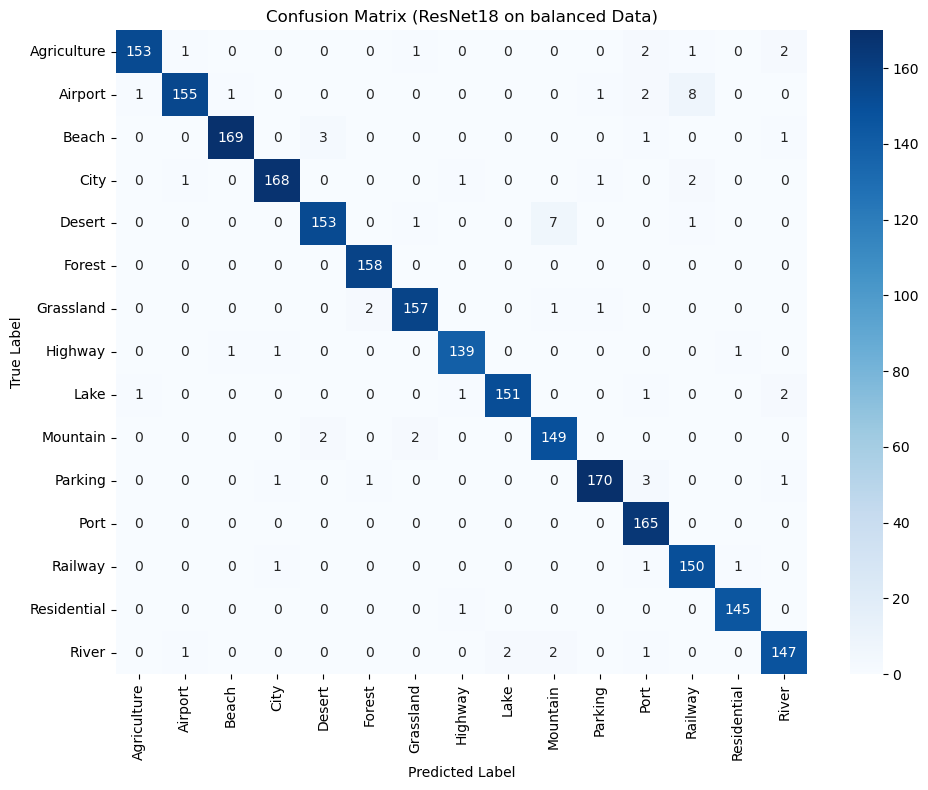

In [1]:
'''resnet18'''
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()

data_dir = r"Aerial_Landscapes"
dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/5 - Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = dataset.classes
print("Classification Report (ResNet18):")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix (balanced dataset with regular resnet18):")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ResNet18 on balanced Data)")
plt.tight_layout()
plt.show()

### efficientnet

Using device: cpu
Epoch 1/5 - Loss: 263.4729
Epoch 2/5 - Loss: 55.5668
Epoch 3/5 - Loss: 30.6261
Epoch 4/5 - Loss: 20.4929
Epoch 5/5 - Loss: 16.1499
Classification Report (EfficientNet_b0):
              precision    recall  f1-score   support

 Agriculture       0.97      0.99      0.98       158
     Airport       0.97      0.99      0.98       160
       Beach       1.00      0.98      0.99       162
        City       0.98      0.99      0.99       156
      Desert       0.96      0.99      0.97       154
      Forest       0.98      0.97      0.98       151
   Grassland       0.97      0.98      0.97       174
     Highway       0.97      0.97      0.97       148
        Lake       0.97      0.97      0.97       158
    Mountain       0.99      0.95      0.97       150
     Parking       0.99      0.98      0.98       165
        Port       0.99      0.98      0.99       172
     Railway       0.98      0.96      0.97       166
 Residential       0.99      0.99      0.99       172

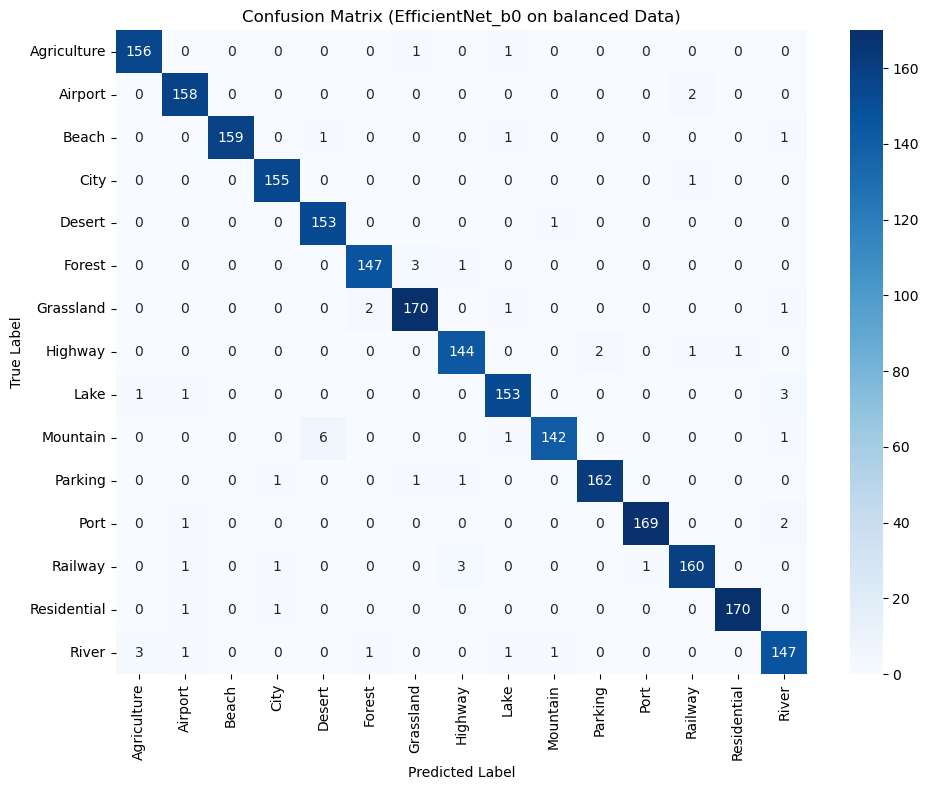

In [1]:
'''efficientnet'''
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

weights = EfficientNet_B0_Weights.DEFAULT
preprocess = weights.transforms()

data_dir = r"Aerial_Landscapes"
dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

model = efficientnet_b0(weights=weights)
num_classes = len(dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/5 - Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = dataset.classes
print("Classification Report (EfficientNet_b0):")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
'''cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix (balanced dataset with EfficientNet_b0):")
print(cm_df)'''

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (EfficientNet_b0 on balanced Data)")
plt.tight_layout()
plt.show()


# Imbalanced Data

### resnet18

Using: cpu
[Epoch 1] Training Loss: 55.5375
[Epoch 2] Training Loss: 9.2141
[Epoch 3] Training Loss: 4.0863
[Epoch 4] Training Loss: 2.3881
[Epoch 5] Training Loss: 1.9970
Classification Report (ResNet18 trained on imbalanced data):
              precision    recall  f1-score   support

 Agriculture    0.89714   0.98742   0.94012       159
     Airport    0.67907   0.97987   0.80220       149
       Beach    0.93370   0.94944   0.94150       178
        City    0.93878   0.84663   0.89032       163
      Desert    0.98649   0.91250   0.94805       160
      Forest    0.95620   0.92254   0.93907       142
   Grassland    0.86500   1.00000   0.92761       173
     Highway    0.93082   0.94872   0.93968       156
        Lake    0.93750   0.87209   0.90361       172
    Mountain    0.87500   0.97765   0.92348       179
     Parking    0.96429   0.93103   0.94737       145
        Port    0.94545   0.94545   0.94545       165
     Railway    0.88136   0.73759   0.80309       141
 Residenti

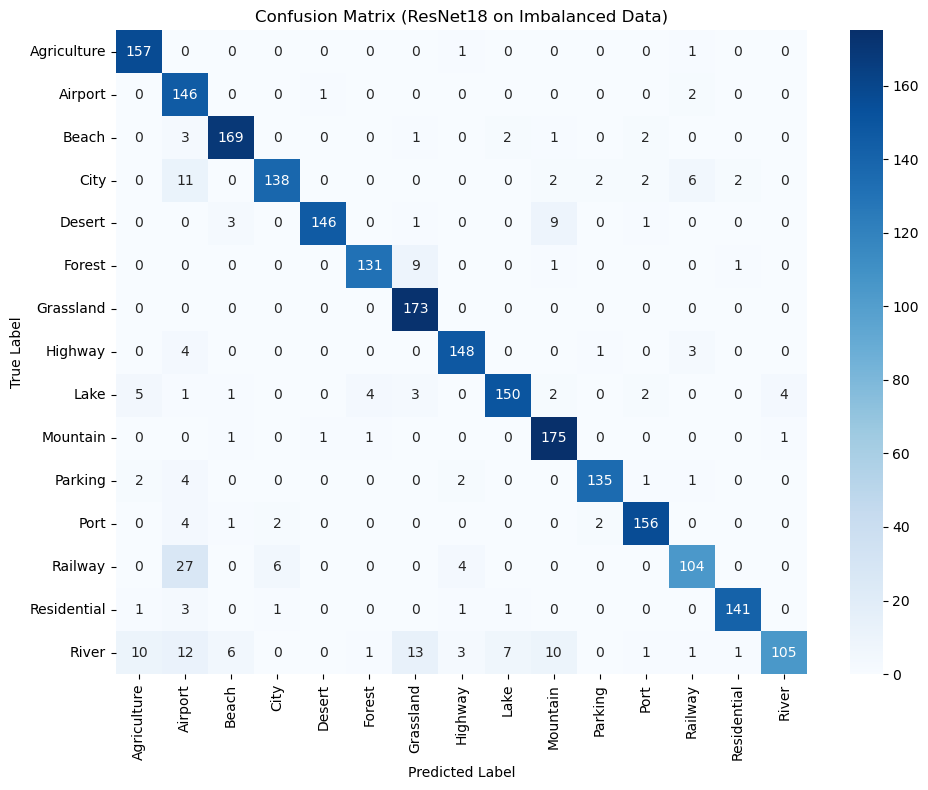

In [12]:
'''resnet18 in imbalanced dataset(without preprocessing)'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()
data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 300] + [70]*12 + [30])}

imbal_train_indices = []
for cls, indices in class_to_indices.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 15)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (ResNet18 trained on imbalanced data):")
print(classification_report(y_true, y_pred, target_names=class_names,digits = 5))

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix (inbalanced dataset with regular resnet18):")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ResNet18 on Imbalanced Data)")
plt.tight_layout()
plt.show()

### efficientnet

Using: cpu
[Epoch 1] Training Loss: 108.1358
[Epoch 2] Training Loss: 57.1749
[Epoch 3] Training Loss: 29.0671
[Epoch 4] Training Loss: 16.2387
[Epoch 5] Training Loss: 10.7450
Classification Report (EfficientNet_b0 on Imbalanced Data):
              precision    recall  f1-score   support

 Agriculture    0.81250   0.98113   0.88889       159
     Airport    0.69524   0.97987   0.81337       149
       Beach    0.91444   0.96067   0.93699       178
        City    0.95513   0.91411   0.93417       163
      Desert    0.95062   0.96250   0.95652       160
      Forest    0.89032   0.97183   0.92929       142
   Grassland    0.97561   0.92486   0.94955       173
     Highway    0.95364   0.92308   0.93811       156
        Lake    0.77041   0.87791   0.82065       172
    Mountain    0.89474   0.94972   0.92141       179
     Parking    0.98582   0.95862   0.97203       145
        Port    0.94156   0.87879   0.90909       165
     Railway    0.89051   0.86525   0.87770       141
 Resid

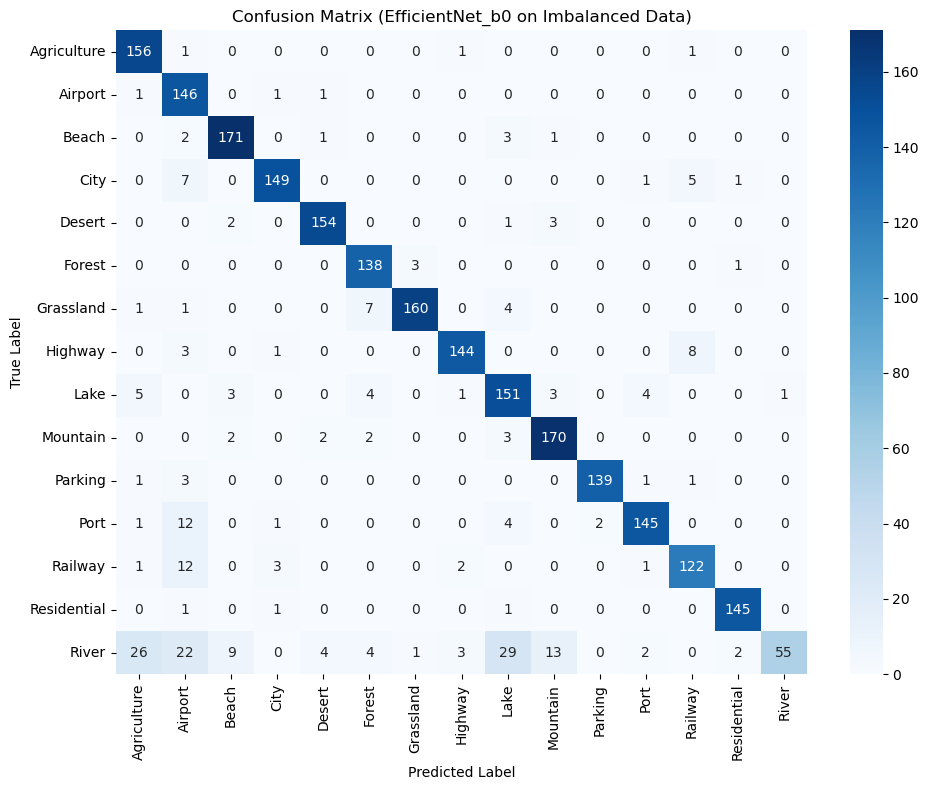

In [15]:
'''efficientnet on imbalanced dataset'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = EfficientNet_B0_Weights.DEFAULT
preprocess = weights.transforms()

data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 300] + [70]*12 + [30])}
imbal_train_indices = []
for cls, indices in class_to_indices.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = efficientnet_b0(weights=weights)
num_classes = len(full_dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (EfficientNet_b0 on Imbalanced Data):")
print(classification_report(y_true, y_pred, target_names=class_names,digits = 5))

cm = confusion_matrix(y_true, y_pred)
'''cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix:")
print(cm_df)'''

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (EfficientNet_b0 on Imbalanced Data)")
plt.tight_layout()
plt.show()


> **Observation:** 
> 
> Focus on resnet18 to improve the performance
> 
> Efficientnet has lower recall on imbalanced features

### ResNet18 + Focal Loss + Reweighting

Using: cpu
[Epoch 1] Training Loss: 665.2109
[Epoch 2] Training Loss: 79.1282
[Epoch 3] Training Loss: 22.3405
[Epoch 4] Training Loss: 14.5887
[Epoch 5] Training Loss: 8.8584
Classification Report (ResNet18 + Focal Loss + Reweighting):
              precision    recall  f1-score   support

 Agriculture       0.87      0.98      0.92       159
     Airport       0.78      0.94      0.85       149
       Beach       0.92      0.95      0.94       178
        City       0.92      0.93      0.93       163
      Desert       0.96      0.93      0.95       160
      Forest       0.94      0.92      0.93       142
   Grassland       0.90      0.98      0.94       173
     Highway       0.91      0.96      0.93       156
        Lake       0.92      0.88      0.90       172
    Mountain       0.85      0.99      0.91       179
     Parking       0.97      0.94      0.95       145
        Port       0.99      0.90      0.94       165
     Railway       0.93      0.80      0.86       141
 Resid

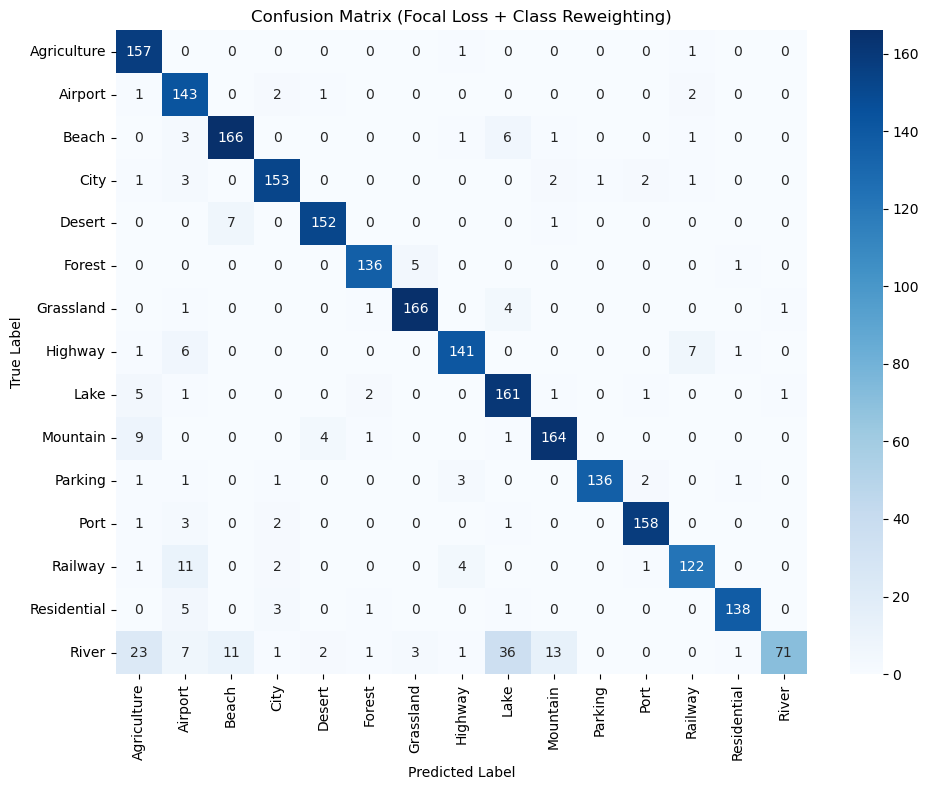

In [5]:
'''ResNet18 + Focal Loss + Reweighting'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, Subset
from collections import defaultdict, Counter
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()
data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 300] + [70]*12 + [30])}
imbal_train_indices = []
for cls, indices in class_to_indices.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 15)
model = model.to(device)

imbal_labels = [full_dataset.targets[i] for i in imbal_train_indices]
label_counts = Counter(imbal_labels)
total = sum(label_counts.values())

class_weights = []
for i in range(15):
    freq = label_counts[i] if i in label_counts else 1
    class_weights.append(total / freq)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

def focal_loss(outputs, targets, alpha=None, gamma=1.5):
    ce_loss = F.cross_entropy(outputs, targets, reduction='none')
    pt = torch.exp(-ce_loss)
    alpha_t = alpha[targets] if alpha is not None else 1.0
    return (alpha_t * (1 - pt) ** gamma * ce_loss).mean()

optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = focal_loss(outputs, labels, alpha=class_weights, gamma=2.0)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (ResNet18 + Focal Loss + Reweighting):")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
'''cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix:")
print(cm_df)'''

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Focal Loss + Class Reweighting)")
plt.tight_layout()
plt.show()



### resnet18 + Focal + Dice Loss

Using: cpu
[Epoch 1] Training Loss: 790.4451
[Epoch 2] Training Loss: 86.0664
[Epoch 3] Training Loss: 37.9018
[Epoch 4] Training Loss: 39.3560
[Epoch 5] Training Loss: 30.4654
Classification Report (Focal + Dice Loss):
              precision    recall  f1-score   support

 Agriculture       0.95      0.94      0.95       159
     Airport       0.76      0.96      0.85       149
       Beach       0.93      0.95      0.94       178
        City       0.85      0.96      0.90       163
      Desert       0.95      0.98      0.97       160
      Forest       0.84      0.98      0.91       142
   Grassland       0.93      0.93      0.93       173
     Highway       0.97      0.88      0.93       156
        Lake       0.84      0.89      0.86       172
    Mountain       0.91      0.94      0.93       179
     Parking       0.97      0.94      0.95       145
        Port       0.97      0.88      0.92       165
     Railway       0.91      0.74      0.82       141
 Residential       0.97

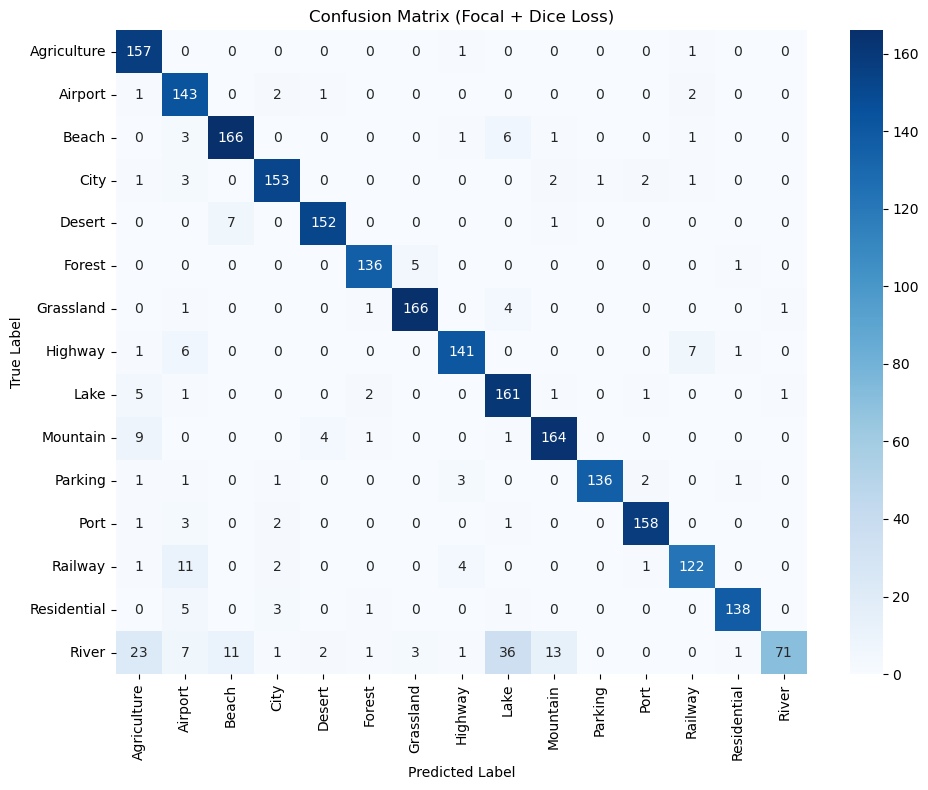

In [8]:
'''resnet18 + Focal + Dice Loss'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, Subset
from collections import defaultdict, Counter
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()
data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 300] + [70]*12 + [30])}
imbal_train_indices = []
for cls, indices in class_to_indices.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 15)
model = model.to(device)

imbal_labels = [full_dataset.targets[i] for i in imbal_train_indices]
label_counts = Counter(imbal_labels)
total = sum(label_counts.values())
class_weights = []
for i in range(15):
    freq = label_counts[i] if i in label_counts else 1
    class_weights.append(total / freq)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

def focal_loss(outputs, targets, alpha=None, gamma=2.0):
    ce_loss = F.cross_entropy(outputs, targets, reduction='none')
    pt = torch.exp(-ce_loss)
    alpha_t = alpha[targets] if alpha is not None else 1.0
    return (alpha_t * (1 - pt) ** gamma * ce_loss).mean()

def dice_loss(outputs, targets, smooth=1e-5):
    num_classes = outputs.size(1)
    outputs = F.softmax(outputs, dim=1)  # [B, C]

    targets_onehot = F.one_hot(targets, num_classes=num_classes).float()  # [B, C]

    intersection = (outputs * targets_onehot).sum(dim=0)
    union = outputs.sum(dim=0) + targets_onehot.sum(dim=0)

    dice = (2 * intersection + smooth) / (union + smooth)
    return 1 - dice.mean()


optimizer = optim.Adam(model.parameters(), lr=1e-4)

lambda_focal = 1.0
lambda_dice = 0.5

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)

        loss_focal = focal_loss(outputs, labels, alpha=class_weights, gamma=1.5)
        loss_dice = dice_loss(outputs, labels)
        loss = lambda_focal * loss_focal + lambda_dice * loss_dice

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (Focal + Dice Loss):")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
'''cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix:")
print(cm_df)'''

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Focal + Dice Loss)")
plt.tight_layout()
plt.show()


**SOLUTION ON IMBALANCED DATASET**

Using: cpu
[Epoch 1] Training Loss: 55.5601
[Epoch 2] Training Loss: 14.7504
[Epoch 3] Training Loss: 10.7610
[Epoch 4] Training Loss: 11.6139
[Epoch 5] Training Loss: 9.3115
Classification Report (ResNet18 + Augment + Focal + Dice + Sampler):
              precision    recall  f1-score   support

 Agriculture    0.92683   0.95597   0.94118       159
     Airport    0.85526   0.87248   0.86379       149
       Beach    0.93407   0.95506   0.94444       178
        City    0.94479   0.94479   0.94479       163
      Desert    0.93333   0.96250   0.94769       160
      Forest    0.91946   0.96479   0.94158       142
   Grassland    0.95429   0.96532   0.95977       173
     Highway    0.95946   0.91026   0.93421       156
        Lake    0.96341   0.91860   0.94048       172
    Mountain    0.88205   0.96089   0.91979       179
     Parking    0.96575   0.97241   0.96907       145
        Port    0.95732   0.95152   0.95441       165
     Railway    0.83544   0.93617   0.88294       141

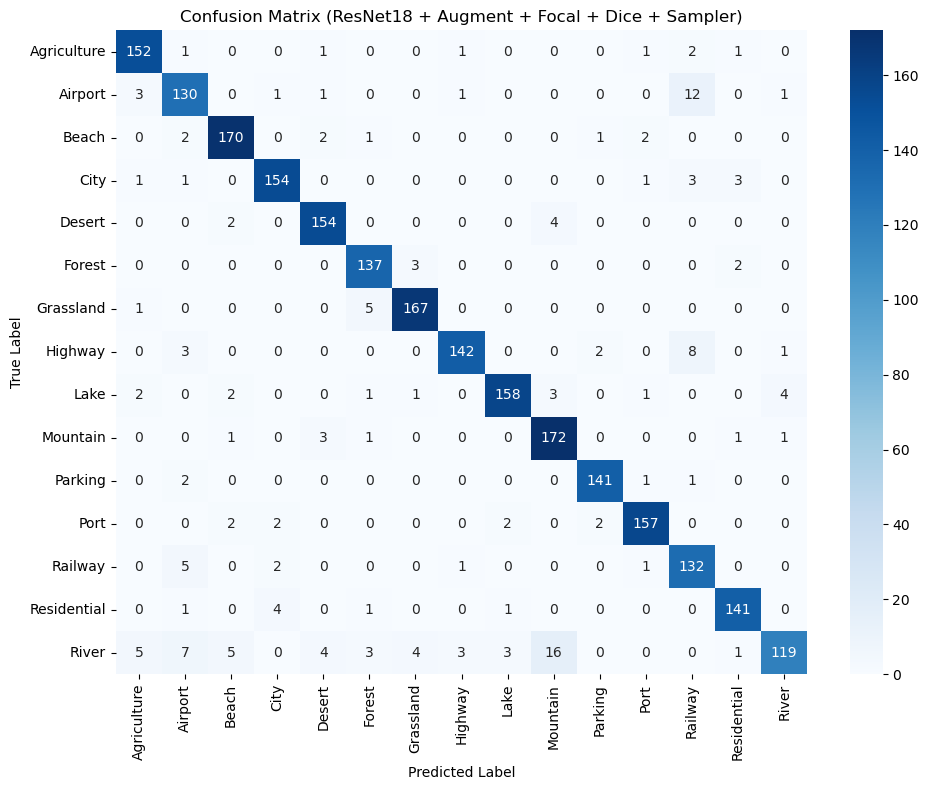

In [11]:
'''A solution to fix imbalanced dataset'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = ResNet18_Weights.DEFAULT
image_size = weights.transforms().crop_size[0]
mean = [0.485, 0.456, 0.406]  # R, G, B
std = [0.229, 0.224, 0.225]
normalize = transforms.Normalize(mean=mean, std=std)

preprocess = transforms.Compose([
    transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.05),
    transforms.ToTensor(),
    normalize
])

data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices_map = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices_map[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 300] + [70]*12 + [30])}
imbal_train_indices = []
for cls, indices in class_to_indices_map.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

imbal_labels = [full_dataset.targets[i] for i in imbal_train_indices]
label_counts = Counter(imbal_labels)
class_weights = {cls: 1.0 / count for cls, count in label_counts.items()}
sample_weights = [class_weights[label] for label in imbal_labels]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 15)
model = model.to(device)

def focal_loss(outputs, targets, gamma=2.0):
    ce_loss = F.cross_entropy(outputs, targets, reduction='none')
    pt = torch.exp(-ce_loss)
    return ((1 - pt) ** gamma * ce_loss).mean()

def dice_loss(outputs, targets, smooth=1e-5):
    num_classes = outputs.size(1)
    outputs = F.softmax(outputs, dim=1)
    targets_onehot = F.one_hot(targets, num_classes).float()
    intersection = (outputs * targets_onehot).sum(dim=0)
    union = outputs.sum(dim=0) + targets_onehot.sum(dim=0)
    dice = (2 * intersection + smooth) / (union + smooth)
    return 1 - dice.mean()

optimizer = optim.Adam(model.parameters(), lr=1e-4)
lambda_focal = 1.0
lambda_dice = 0.5

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss_f = focal_loss(outputs, labels)
        loss_d = dice_loss(outputs, labels)
        loss = lambda_focal * loss_f + lambda_dice * loss_d
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (ResNet18 + Augment + Focal + Dice + Sampler):")
print(classification_report(y_true, y_pred, target_names=class_names,digits = 5))

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ResNet18 + Augment + Focal + Dice + Sampler)")
plt.tight_layout()
plt.show()


**Recall on small number features improved,total f1 score imporved,total accuracy improved**

**VALID on a new imbalanced dataset**

Using: cpu
[Epoch 1] Training Loss: 55.5888
[Epoch 2] Training Loss: 9.6366
[Epoch 3] Training Loss: 3.8620
[Epoch 4] Training Loss: 2.3906
[Epoch 5] Training Loss: 1.2319
Classification Report (ResNet18 trained on imbalanced data):
              precision    recall  f1-score   support

 Agriculture    0.90751   0.98742   0.94578       159
     Airport    0.71078   0.97315   0.82153       149
       Beach    0.96855   0.86517   0.91395       178
        City    0.93506   0.88344   0.90852       163
      Desert    0.92169   0.95625   0.93865       160
      Forest    0.90789   0.97183   0.93878       142
   Grassland    0.95349   0.94798   0.95072       173
     Highway    0.98621   0.91667   0.95017       156
        Lake    0.91195   0.84302   0.87613       172
    Mountain    0.92432   0.95531   0.93956       179
     Parking    0.97857   0.94483   0.96140       145
        Port    0.93976   0.94545   0.94260       165
     Railway    0.89844   0.81560   0.85502       141
 Residenti

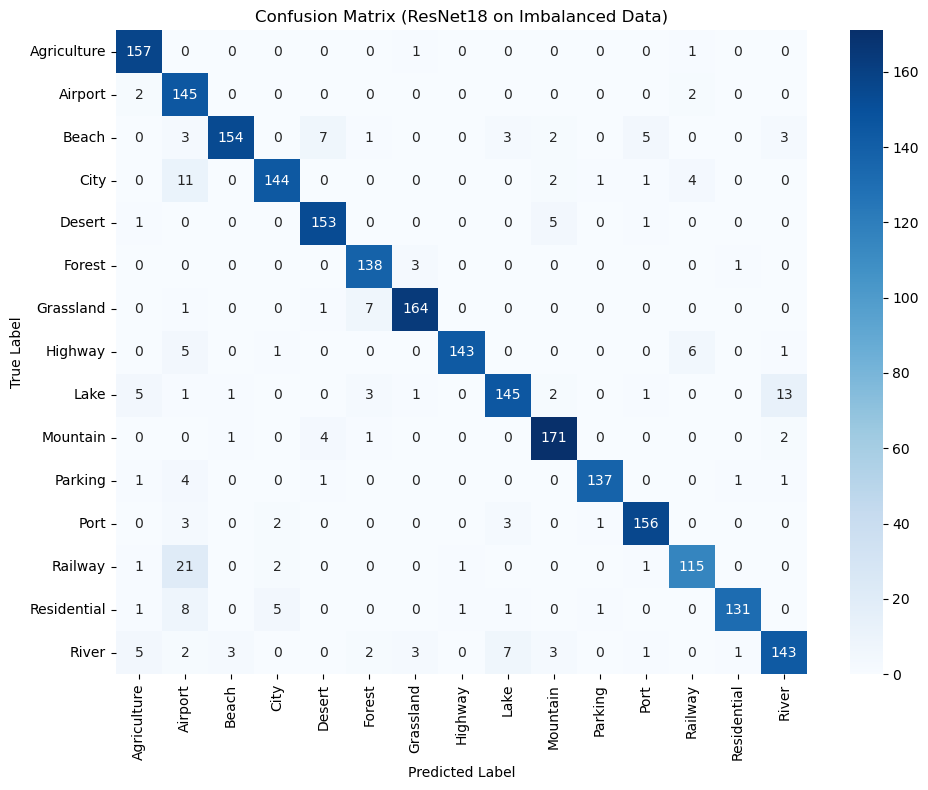

In [13]:
'''resnet18 in imbalanced dataset(without preprocessing)'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()
data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 400] + [30] + [70]*12)}

imbal_train_indices = []
for cls, indices in class_to_indices.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 15)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (ResNet18 trained on imbalanced data):")
print(classification_report(y_true, y_pred, target_names=class_names,digits = 5))

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix (inbalanced dataset with regular resnet18):")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ResNet18 on Imbalanced Data)")
plt.tight_layout()
plt.show()

Using: cpu
[Epoch 1] Training Loss: 57.9967
[Epoch 2] Training Loss: 16.6612
[Epoch 3] Training Loss: 10.8850
[Epoch 4] Training Loss: 7.0384
[Epoch 5] Training Loss: 7.2618
Classification Report (ResNet18 + Augment + Focal + Dice + Sampler):
              precision    recall  f1-score   support

 Agriculture    0.95122   0.98113   0.96594       159
     Airport    0.71000   0.95302   0.81375       149
       Beach    0.94706   0.90449   0.92529       178
        City    0.91566   0.93252   0.92401       163
      Desert    0.96250   0.96250   0.96250       160
      Forest    0.91946   0.96479   0.94158       142
   Grassland    0.98171   0.93064   0.95549       173
     Highway    0.95333   0.91667   0.93464       156
        Lake    0.86486   0.93023   0.89636       172
    Mountain    0.91892   0.94972   0.93407       179
     Parking    0.97203   0.95862   0.96528       145
        Port    0.98684   0.90909   0.94637       165
     Railway    0.90741   0.69504   0.78715       141


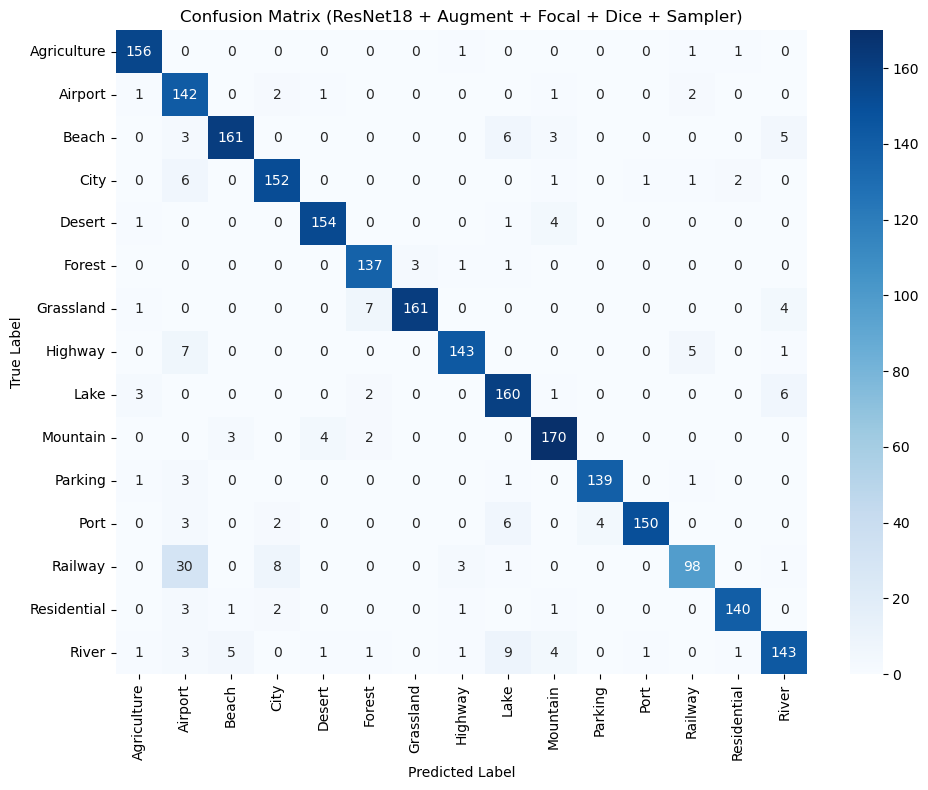

In [14]:
'''A solution to fix imbalanced dataset'''
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

weights = ResNet18_Weights.DEFAULT
image_size = weights.transforms().crop_size[0]
mean = [0.485, 0.456, 0.406]  # R, G, B
std = [0.229, 0.224, 0.225]
normalize = transforms.Normalize(mean=mean, std=std)

preprocess = transforms.Compose([
    transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.05),
    transforms.ToTensor(),
    normalize
])

data_dir = r"Aerial_Landscapes"
full_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_full, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_targets = [full_dataset.targets[i] for i in train_full.indices]
class_to_indices_map = defaultdict(list)
for idx, label in zip(train_full.indices, train_targets):
    class_to_indices_map[label].append(idx)

keep_counts = {cls: count for cls, count in zip(range(15), [500, 400] + [30] + [70]*12)}
imbal_train_indices = []
for cls, indices in class_to_indices_map.items():
    sample_count = min(keep_counts.get(cls, 100), len(indices))
    sampled = random.sample(indices, sample_count)
    imbal_train_indices.extend(sampled)

imbal_train_dataset = Subset(full_dataset, imbal_train_indices)

imbal_labels = [full_dataset.targets[i] for i in imbal_train_indices]
label_counts = Counter(imbal_labels)
class_weights = {cls: 1.0 / count for cls, count in label_counts.items()}
sample_weights = [class_weights[label] for label in imbal_labels]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(imbal_train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 15)
model = model.to(device)

def focal_loss(outputs, targets, gamma=2.0):
    ce_loss = F.cross_entropy(outputs, targets, reduction='none')
    pt = torch.exp(-ce_loss)
    return ((1 - pt) ** gamma * ce_loss).mean()

def dice_loss(outputs, targets, smooth=1e-5):
    num_classes = outputs.size(1)
    outputs = F.softmax(outputs, dim=1)
    targets_onehot = F.one_hot(targets, num_classes).float()
    intersection = (outputs * targets_onehot).sum(dim=0)
    union = outputs.sum(dim=0) + targets_onehot.sum(dim=0)
    dice = (2 * intersection + smooth) / (union + smooth)
    return 1 - dice.mean()

optimizer = optim.Adam(model.parameters(), lr=1e-4)
lambda_focal = 1.0
lambda_dice = 0.5

for epoch in range(5):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss_f = focal_loss(outputs, labels)
        loss_d = dice_loss(outputs, labels)
        loss = lambda_focal * loss_f + lambda_dice * loss_d
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Training Loss: {total_loss:.4f}")

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

class_names = full_dataset.classes
print("Classification Report (ResNet18 + Augment + Focal + Dice + Sampler):")
print(classification_report(y_true, y_pred, target_names=class_names,digits = 5))

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ResNet18 + Augment + Focal + Dice + Sampler)")
plt.tight_layout()
plt.show()


**The f1-score on imbalanced feature(the third one): improved**

**Total accuracy: improved**

**Total f1-score: improved**

# Conclusion

## ml part:

#### (SIFT+SVM): 67% accuracy, 0.67 recall, 67% precision
#### (LBP+KNN): 48% accuracy, 0.48 recall, 50% precision
#### (SIFT+SVM+preprocessing): 69% accuracy, 0.69 recall, 70% precision
#### (SIFT+SVM+edge construction detection): 50% accuracy, 0.51 recall, 51% precision
### use SIFT+SVM+preprocessing, time saving, gpu saving, around 70% accuracy

## dl part:

### balanced dataset:
#### (resnet18): 97% accuracy, 0.97 recall, 97% precision
#### (efficientnet_b0): 98% accuracy, 0.98 recall, 98% precision

### imbalanced dataset:

#### (resnet18): 91.58% accuracy, 0.90 recall, 91.4% precision
#### (efficientnet): 88.74% accuracy, 0.89 recall, 90.57% precision
#### use resnet18 to improve the performance

#### (resnet18+focalloss+reweighting): 91% accuracy, 0.91 recall, 92% precision
#### (resnet18 + Focal + Dice Loss): 91% accuracy, 0.91 recall, 90% precision
#### (ResNet18 + Augment + Focal + Dice + Sampler): 92.75% accuracy, 0.9282 recall, 92.81% precision
### use ResNet18 + Augment + Focal + Dice + Sampler,better performance on training imbanlanced dataset.

## validation:true(on a new imbalanced dataset and test the performance on resnet18 and ResNet18 + Augment + Focal + Dice + Sampler)